# Reading Hammurabi digitally
This notebook represents an attempt to apply digital and quantitatively oriented techniques of analysis to the transliterated and normalized text of the Law Code of Hammurabi (as preserved on the diorite monument currently in the Louvre). At the outset I want to acknowledge the decades of work that has gone into advancing our understanding of the text from its material origins to modern translations. This part of the process is crucial to any further analysis, and even more so when using digital methods that are (for the most part) completely naive to the material, social, and linguistic context from which the text in question arises.

To that aim I am foregrounding the important sources used in the course of the analysis:

- Firstly, this analysis would be impossible without the hard work that went into the digital edition of the text created and hosted by the Cuneiform Digital Library Initiative, available here: [https://cdli.ucla.edu/P464358](https://cdli.ucla.edu/P464358). This digital edition was primarily entered by Bob Englund, with additions by Émilie Pagé-Perron (a full edit history is accessible at this address: [https://cdli.ucla.edu/search/revhistory.php/?txtpnumber=464358&](https://cdli.ucla.edu/search/revhistory.php/?txtpnumber=464358&)).
- Martha Roth's excellent edition of the law code in *Law Collections from Mesopotamia and Asia Minor* is indispensable for her fluid translation and ample context for law codes in general in Mesopotamia.
- Victor Hurowitz's study of the text outside of the laws (in *Inu Anum ṣīrum - Literary Structures in the Non-Juridical Sections of the Codex Hammurabi*) was useful for helping to frame the types of inquiry I attempt below.
- Finally, F. Kraus' study of the place names mentioned in the proglogue (in *WZKM* v. 51 (1948/52), pp. 173-177) helped place Hurowitz's arguments in context.


### Ammendations to the source files:
changed line 735 in lh.atf from:
- ```245. a-na {d}nin-a-zu```

 to
 
- ```245. a-na {d}nin-a-zu i-na esz3-nun-na{ki}```

This follows the interpretation in Kraus, "Codex Ḫammurabi IV 32—44", WZKM (51) pg. 176

In [31]:
import re
from tabulate import tabulate
from matplotlib import pyplot as plt

In [32]:
with open('lh.atf') as f:
    lines = f.read().split('\n')
prologue_start = 0
prologue_end = lines.index('@law 1')
epilogue_start = lines.index('@epilogue')
epilogue_end = -1
prologue = lines[prologue_start:prologue_end]
epilogue = lines[epilogue_start:epilogue_end]

In [33]:
normed_words = ' '.join([line.split(":")[1].strip() for line in prologue+epilogue if line.startswith('#tr.ts')])
print(normed_words[:52])
print(len(normed_words.split()), 'words')

īnu anum ṣīrum šar anunnakī enlil bēl šamê u erṣetim
1397 words


In [34]:
translit_words = ' '.join([re.split("\d'?\.", line)[1].lstrip() for line in prologue+epilogue if re.search("\d+'?\.", line)])
print(translit_words[-10:])
print(len(translit_words.split()), 'words')

szu-da-szu
1394 words


In [35]:
freq = {}
for word in normed_words.split():
    if word in freq.keys():
        freq[word] += 1
    else:
        freq[word] = 1

In [36]:
print("Top 10 words by frequency:")
for word, freq in [(k, v) for k, v in sorted(freq.items(), key=lambda word: word[1], reverse=True)][:10]:
    print(word, '\t', freq)

Top 10 words by frequency:
ina 	 66
ša 	 59
ana 	 55
u 	 38
lā 	 20
mātim 	 16
nišī 	 13
marduk 	 11
šamê 	 10
šarrum 	 10


In [37]:
def kwic(text, target_word, window=1):
    kwic_words = []
    for i, word in enumerate(text):
        if word.startswith(target_word):
            kwic_line = []
            for j in range(-window, window+1):
                if i+j < len(text):
                    kwic_line.append(text[i+j])
            kwic_words.append(kwic_line)
    return kwic_words

In [38]:
print(tabulate(kwic(normed_words.split(), 'niš', 1)))

---------  ------  --------
kiššat     nišī    išīmušum
šīr        nišī    ṭubbim
ana        nišīšu  mullî
mupaḫḫir   nišī    sapḫātim
mušpazzir  nišī    malgium
igmilu     nišī    mera
šāṭip      nišīšu  in
rē’î       nišī    ša
šutēšur    nišī    mātim
šīr        nišī    uṭīb
uṭīb       nišī    dadmī
utliya     nišī    māt
ana        nišī    ibaššû
ana        nišī    ana
šīr        nišīšu  liṭīb
lirrik     nišīšu  ina
naspuḫ     nišīšu  šarrūssu
ḫalāq      nišīšu  tabāk
napišti    nišī    ay
apim       nišīšu  liqmi
qerbīt     nišīšu  zēr
kīma       nišik   mūtim
ṣābašu     nišīšu  u
---------  ------  --------


In [39]:
# the land as a genetive construct
print(tabulate(kwic(normed_words.split(), 'māt', 1)))

--------  -------  ---------
šīmāt     mātim    ana
ina       mātim    ana
waṣêmma   mātim    nuwwurim
ṣulūl     mātim    mupaḫḫir
ana       māt      šumerim
nišī      mātim    ūsim
pī        mātim    aškun
ukinnuma  mātam    ussam
šīr       mātim    uṭīb
nišī      māt      šumerim
dīn       mātim    ana
purussê   mātim    ana
ina       mātim    lištēpi
u         mātam    uštēšer
ina       mātim    ibbaššû
dīn       mātim    ša
purussē   mātim    ša
dīn       mātim    ša
purussē   mātim    ša
ina       mātišu   raggam
ina       mātim    lā
šulput    mātišu   ḫalāq
ḫalāq     mātišu   liškunšum
ana       māt      nukurtišu
ša        mātātim  ummum
--------  -------  ---------


In [40]:
print(tabulate(kwic(normed_words.split(), 'erṣ', 1)))

--------  --------  --------
u         erṣetim   šā’im
u         erṣetim   išdāša
u         erṣetim   zāninum
u         erṣetim   išdāšu
u         erṣetim   mīšarī
ina       erṣetišu  ašnan
u         erṣetim   muštēšer
ina       erṣetim   eṭemmašu
u         erṣetim   rēṣūa
damīšunu  erṣetam   lišqi
u         erṣetim   anunnakū
--------  --------  --------


In [41]:
print(tabulate(kwic(normed_words.split(), 'šamê', 1)))

------  ----  -----
bēl     šamê  u
kīma    šamê  u
markas  šamê  u
kīma    šamê  u
ša      šamê  u
ša      šamê  u
bēl     šamê  ilum
gugal   šamê  u
ina     šamê  mīlam
ša      šamê  u
------  ----  -----


In [42]:
print(tabulate(kwic(normed_words.split(), 'anāku', 1)))

-----------  -------  --------
enlil        anāku    mukammer
ištar        anāku    inūma
gitmālum     anāku    ana
ibbûninnima  anākuma  rē’ûm
šūturu       anāku    awâtūa
išrukušum    anāku    awâtūa
-----------  -------  --------


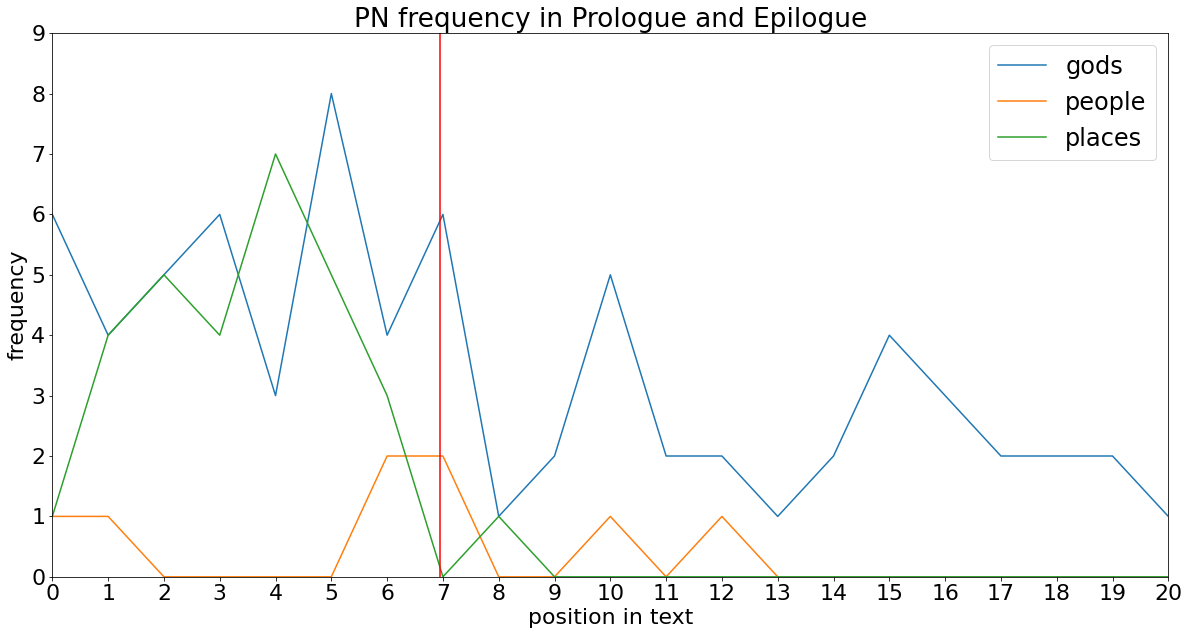

In [48]:
num_boxes = 21
box_size = len(translit_words.split()) // (num_boxes - 1)
gods = [0] * num_boxes
people = [0] * num_boxes
places = [0] * num_boxes
for i, box in enumerate([
    translit_words.split()[i:i+box_size] 
    for i in range(0, len(translit_words.split()), box_size)
]):
    for word in box:
        if word.startswith('{d}'): gods[i] += 1
        if word.startswith('{disz}'): people[i] += 1
        if word.endswith('{ki}'): places[i] += 1

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))
plt.axis([0, num_boxes-1, 0, max(gods+people+places)+1])

plt.plot(gods, label='gods')
plt.plot(people, label='people')
plt.plot(places, label='places')

plt.ylabel('frequency')
plt.xlabel('position in text')
plt.xticks(range(0, num_boxes))
# Draw line dividing prologue from epilogue
plt.axvline(480 / box_size, color='red')
plt.title('PN frequency in Prologue and Epilogue')
plt.legend(prop={'size': 24})

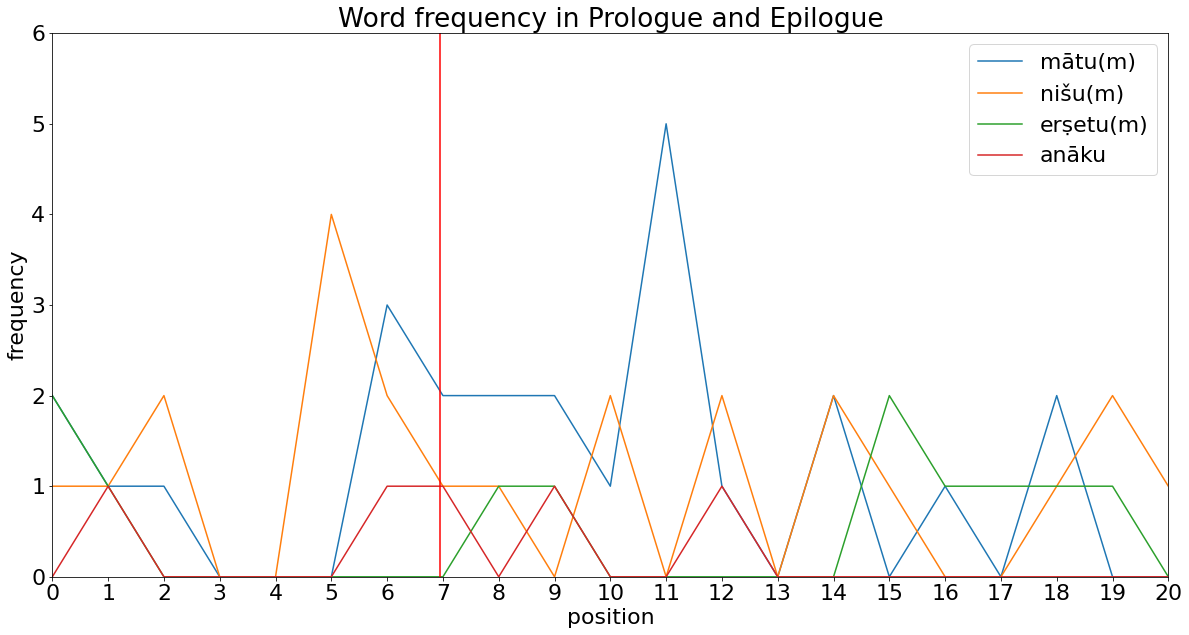

In [50]:
num_boxes = 21
box_size = len(normed_words.split()) // (num_boxes - 1)
land = [0] * num_boxes
people = [0] * num_boxes
earth = [0] * num_boxes
anaku = [0] * num_boxes
for i, box in enumerate([
    normed_words.split()[i:i+box_size] 
    for i in range(0, len(normed_words.split()), box_size)
]):
    for word in box:
        if word.startswith('māt'): land[i] += 1
        if word.startswith('niš'): people[i] += 1
        if word.startswith('erṣ'): earth[i] += 1
        if word == 'anāku': anaku[i] += 1

plt.rcParams.update({'font.size': 22})                
plt.figure(figsize=(20,10))
plt.axis([0, num_boxes-1, 0, max(land+people+earth)+1])

plt.plot(land, label='mātu(m)')
plt.plot(people, label='nišu(m)')
plt.plot(earth, label='erṣetu(m)')
plt.plot(anaku, label='anāku')

plt.ylabel('frequency')
plt.xlabel('position')
plt.xticks(range(0, num_boxes))
# Draw line dividing prologue from epilogue
plt.axvline(480 / box_size, color='red')
plt.title("Word frequency in Prologue and Epilogue")
plt.legend()

In [74]:
with open('stemmed_lh.txt') as f:
    lh_stems = f.read().split()
STOP_WORDS = ['ina', 'ša', 'ana', 'u', 'lā', 'ul', 'šū', 'kīma', 'šumma']
lh_stems = [stem for stem in lh_stems if stem not in STOP_WORDS]

In [75]:
# bigrams
bigrams = []
prev = lh_stems[0]
for word in lh_stems[1:]:
    bigrams.append((prev, word))
    prev = word


from collections import Counter
graph = []
for bigram, count in Counter(bigrams).items():
    graph.append((bigram[0], bigram[1], {'weight': count}))

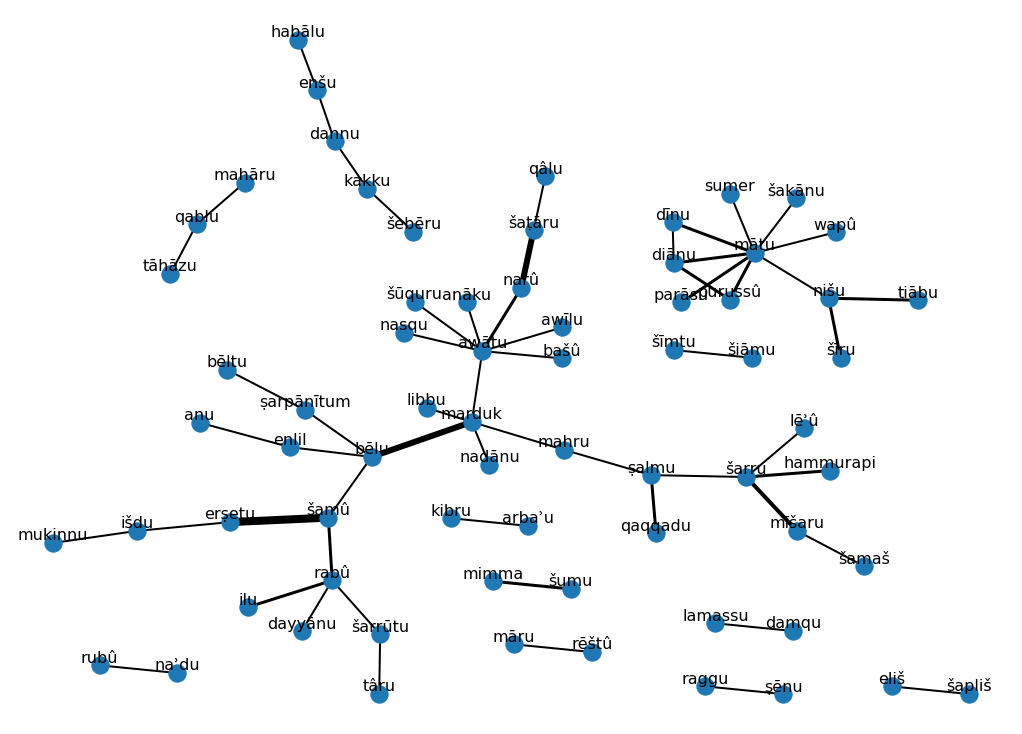

In [76]:
import networkx as nx
import numpy as np

G = nx.Graph()
G.add_edges_from([item for item in graph if item[2]['weight'] > 1])

# pos = nx.kamada_kawai_layout(G, scale=10)
# pos = nx.spring_layout(G, k=.3)
pos = nx.nx_agraph.pygraphviz_layout(G)

weights = [G[u][v]['weight'] for u,v in G.edges()]

plt.figure(1, figsize=(14, 10))
nx.draw(G, pos, verticalalignment='bottom', with_labels=True, font_size=16, width=weights)

In [196]:
[item for item in graph if item[2]['weight'] > 3]

[('šamû', 'erṣetu', {'weight': 8}),
 ('marduk', 'bēlu', {'weight': 6}),
 ('narû', 'šaṭāru', {'weight': 6}),
 ('šarru', 'mīšaru', {'weight': 4})]

In [78]:
print('\n'.join([k for k, v in sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)][:10]))

mātu
awātu
marduk
bēlu
šarru
rabû
šamû
ṣalmu
nišu
diānu


In [52]:
with open('stemmed_ribo.txt') as f:
    ribo_stems = f.read().split()
STOP_WORDS = ['ina', 'ša', 'ana', 'u', 'lā', 'ul', 'šū', 'kīma', 'šumma','adi', 'šūt']
ribo_stems = [stem for stem in ribo_stems if stem not in STOP_WORDS]

In [80]:
# bigrams
bigrams = []
prev = ribo_stems[0]
for word in ribo_stems[1:]:
    bigrams.append((prev, word))
    prev = word


from collections import Counter
graph = []
for bigram, count in Counter(bigrams).items():
    graph.append((bigram[0], bigram[1], {'weight': count}))

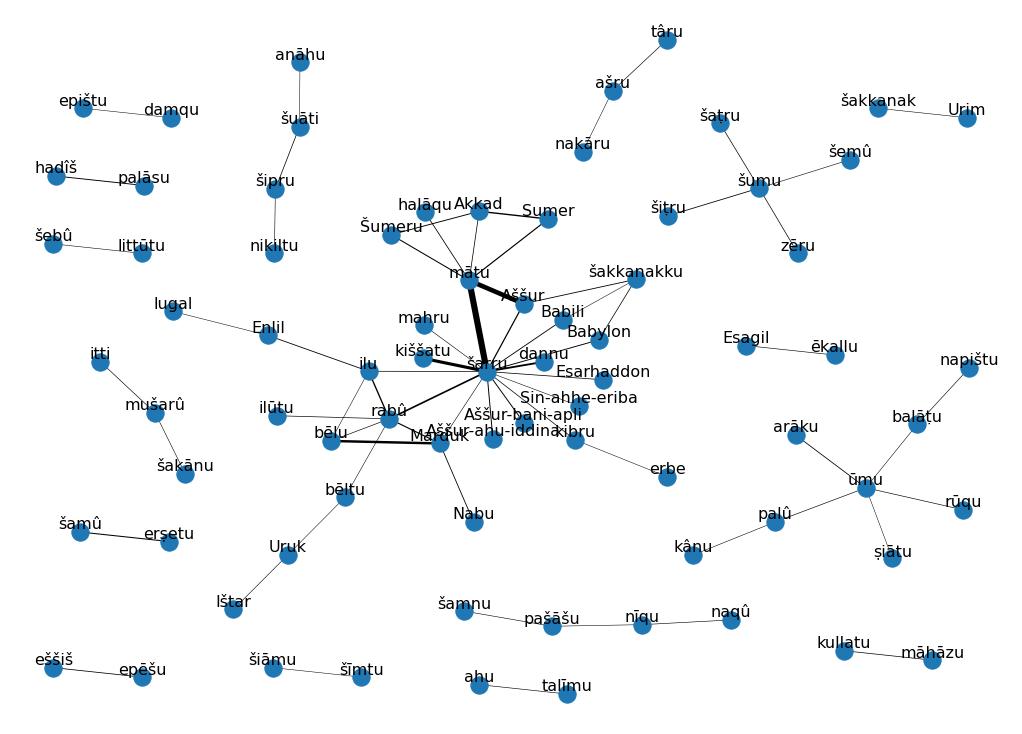

In [81]:
import networkx as nx
import numpy as np

G = nx.Graph()
G.add_edges_from([item for item in graph if item[2]['weight'] > 14])

# pos = nx.kamada_kawai_layout(G, scale=10)
# pos = nx.spring_layout(G, k=.3)
pos = nx.nx_agraph.pygraphviz_layout(G)

weights = [G[u][v]['weight']/30 for u,v in G.edges()]

plt.figure(1, figsize=(14, 10))
nx.draw(G, pos, verticalalignment='bottom', with_labels=True, font_size=16, width=weights)

In [82]:
print('\n'.join([k for k, v in sorted(nx.degree_centrality(G).items(), key=lambda item: item[1], reverse=True)][:10]))

šarru
rabû
mātu
bēlu
ūmu
ilu
Marduk
šumu
Aššur
Akkad
